In [1]:
import pandas, warnings, os, urllib

import numpy as np

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
if not os.path.exists("Helper.py"):

  giturl = "https://raw.githubusercontent.com/Kelniit/Jar/refs/heads/master/Helper.py"

  urllib.request.urlretrieve(giturl, "Helper.py")

In [3]:
air = "airline.csv"

airline = pandas.read_table(air, sep=",", parse_dates=["Month"])

airline.columns = ["Month", "Monthly Passengers"]

airline = airline.set_index("Month").sort_index()

airline.iloc[:5]

,Monthly Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
airline.tail()

,Monthly Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [5]:
airline.index.min().date()

datetime.date(1949, 1, 1)

In [6]:
airline.index.max().date()

datetime.date(1960, 12, 1)

In [7]:
null = airline.isnull().sum()

null.sum()

np.int64(0)

In [8]:
total_airline = airline.shape[0]

total_airline

144

🚀 Ch.01 Result

Our Airline Table is From January 1949 to December 1960

Our Airline Table is Clear of Missing Value

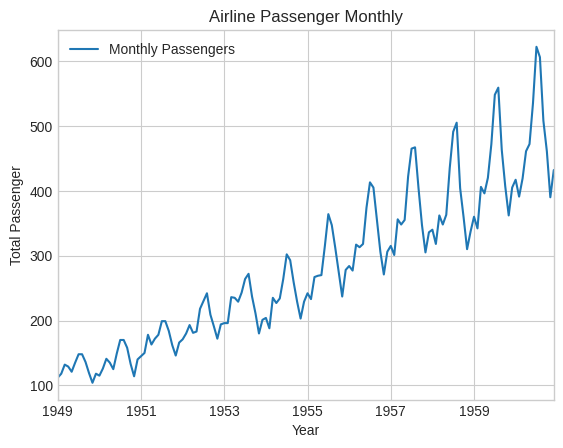

In [9]:
title = "Airline Passenger Monthly"

xlabel = "Year"

ylabel = "Total Passenger"

airline.plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

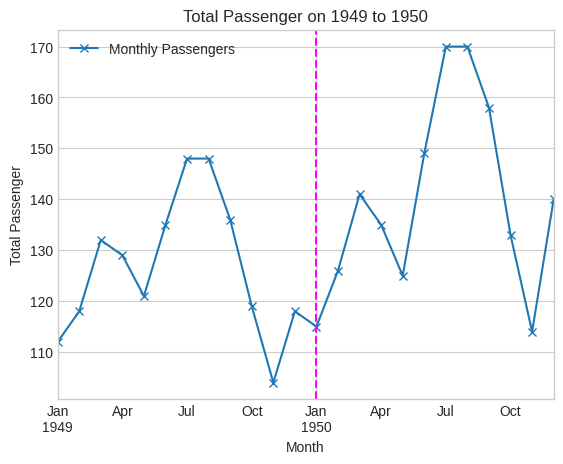

In [10]:
title = "Total Passenger on 1949 to 1950"

xlabel = "Month"

ylabel = "Total Passenger"

series = airline["1949-01-01":"1950-12-31"]

axes = series.plot.line(title=title, xlabel=xlabel, ylabel=ylabel, marker="x")

axes.axvline("1950-01-01", color="magenta", linestyle="--");

On 1949 and 1950, There are *Seasonality* on Yearly Basis

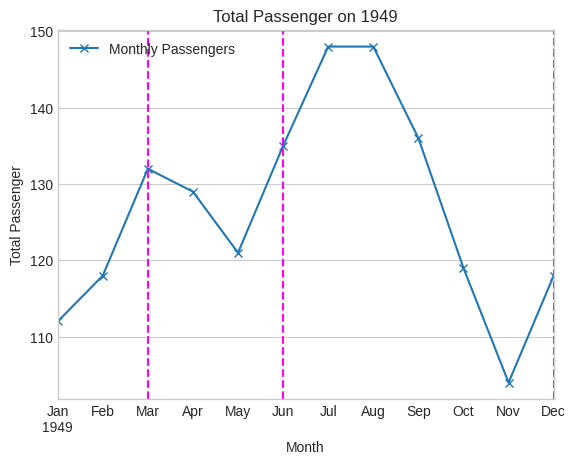

In [11]:
title = "Total Passenger on 1949"

xlabel = "Month"

ylabel = "Total Passenger"

series = airline["1949-01-01":"1949-12-01"]

axes = series.plot.line(title=title, xlabel=xlabel, ylabel=ylabel, marker="x")

for lab in ["1949-03", "1949-06", "1949-12"]:

  axes.axvline(lab, color="magenta", linestyle="--")

Our Total Monthly Passengers *Increased on March, June, and December* and *Decreased on May and September*

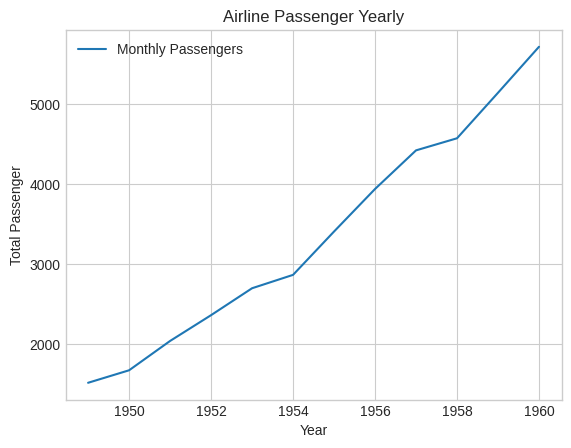

In [12]:
total = airline.groupby(airline.index.year).sum()

title = "Airline Passenger Yearly"

xlabel = "Year"

total.plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

🚀 Ch.02 Plot Result

Our Airline Table is in January 1949 to December 1960

Over the Years, Our Monthly Total Passengers Trend is *Increasing* and also Having Consistent *Seasonality*

Main Reason on Our Monthly Total Passengers *Seasonality* is *Holiday*

On June to August, *in the Northern Hemisphere is Summer Holiday*. On December, is *Christmas and New Year Eve*

In [13]:
from statsmodels.tools.sm_exceptions import ValueWarning

from statsmodels.tsa.seasonal import seasonal_decompose

warnings.simplefilter('ignore', ValueWarning)

airline_report = seasonal_decompose(airline)

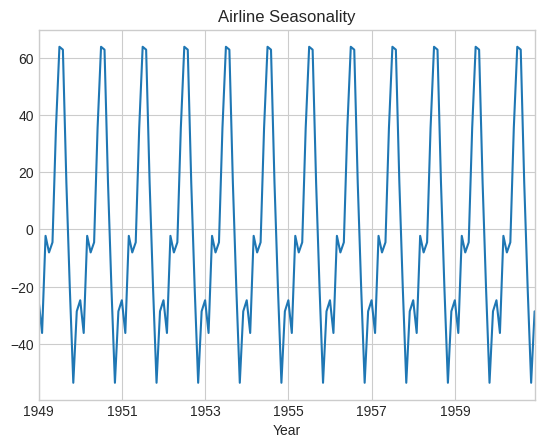

In [14]:
title  = "Airline Seasonality"

xlabel = "Year"

airline_report.seasonal.plot(title=title, xlabel=xlabel);

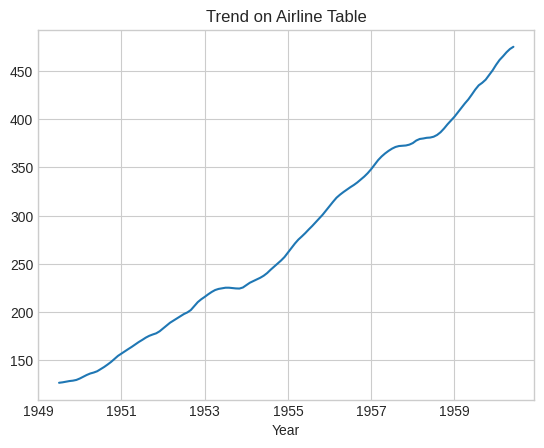

In [15]:
title  = "Trend on Airline Table"

xlabel = "Year"

airline_report.trend.plot(title=title, xlabel=xlabel);

In [16]:
from Helper import FullTest, ModelArima, Helplot

alpha = 0.05

FullTest(airline, alpha)

(np.False_, np.float64(0.8153688792060498))

In [17]:
samples = airline.diff().dropna()

FullTest(samples, alpha)

(np.True_, np.float64(-2.8292668241700047))

Initially, Our Airline Table *isn't Stationary*. Our Airline *is Stationary at First Order Diff*

We'll Use Sample Satu Table to ACF & PACF Plot

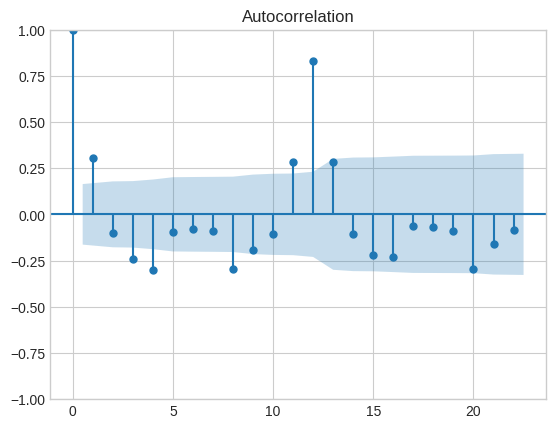

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(samples);

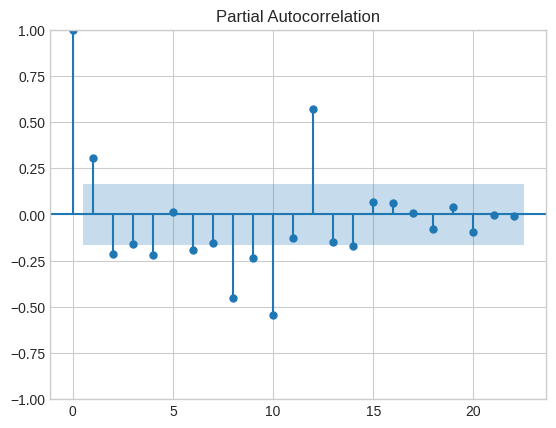

In [19]:
plot_pacf(samples);

🚀 Ch.03 Plot Result

Due to *First Order Diff*, Our *d* Will be 1. Our *p* Will be 1 or 2. Our *q* Will be 1

In [20]:
train_split = int(0.95 * total_airline)

train = airline.iloc[:train_split]

test = airline.iloc[train_split:]

len(train), len(test)

(136, 8)

In [21]:
from sklearn.metrics import mean_squared_error

orders = [(1, 1, 1), (2, 1, 1)]

errors = []; error_list = []

for order in orders:

  logits, aic = ModelArima(train, len(test), order)

  error = np.sqrt(mean_squared_error(test, logits))

  errors.append(error); error_list.append(aic)

np.argmin(error_list), np.argmin(errors)

(np.int64(1), np.int64(0))

In [22]:
error_list

[np.float64(1293.9556735731794), np.float64(1284.5433596019288)]

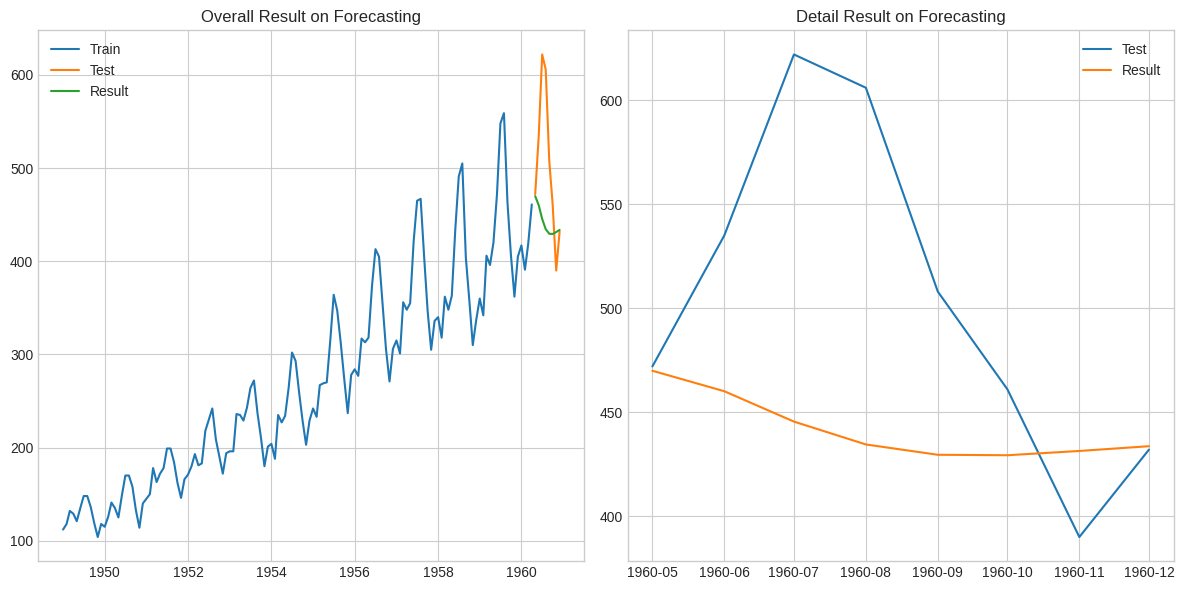

In [23]:
order = orders[np.argmin(error_list)]

logits, aic = ModelArima(train, len(test), order)

Helplot(train, test, logits)

In [24]:
orders = [(1, 1, 1), (2, 1, 1)]

error_rate = []; model_aic = []

for order in orders:

  logits, aic = ModelArima(train, len(test), order, seasonal_order=(1, 1, 0, 12))

  error = np.sqrt(mean_squared_error(test, logits))

  error_rate.append(error); model_aic.append(aic)

error_rate

[np.float64(15.425587623997018), np.float64(13.3911030706747)]

In [25]:
model_aic

[np.float64(956.4344664104867), np.float64(953.4313998287951)]

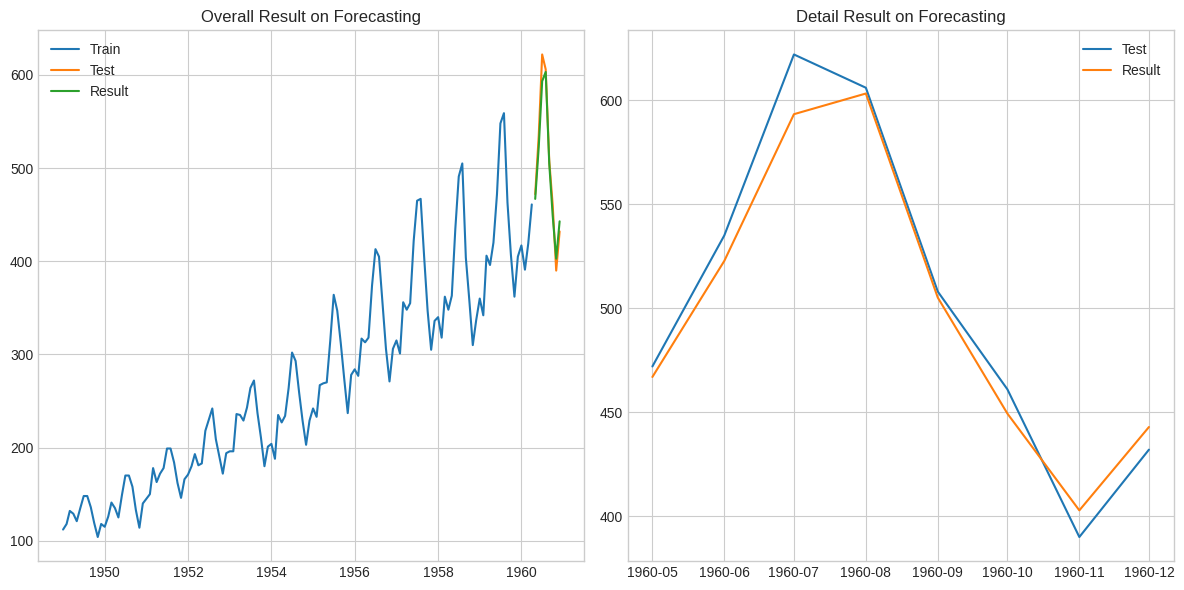

In [26]:
order = orders[np.argmin(model_aic)]

logits, aic = ModelArima(train, len(test), order, seasonal_order=(1, 1, 0, 12))

Helplot(train, test, logits)

🚀 Seasonal Arima Result

*Our Seasonal Arima Model is Magnifico !*

Our Final Model is *Seasonal Arima with Order (2, 1, 1) and Seasonal Order (1, 1, 0, 12)*

We'll Forecast Our Total Monthly Airline Passengers on 1961

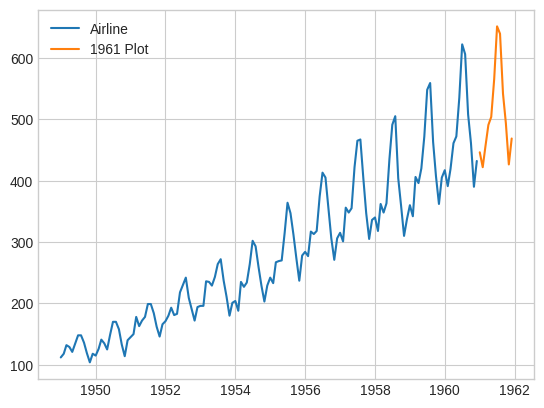

In [27]:
logits, aic = ModelArima(airline, 12, order=(2, 1, 1), seasonal_order=(1, 1, 0, 12))

plt.plot(airline, label="Airline")

plt.plot(logits, label="1961 Plot")

plt.legend();

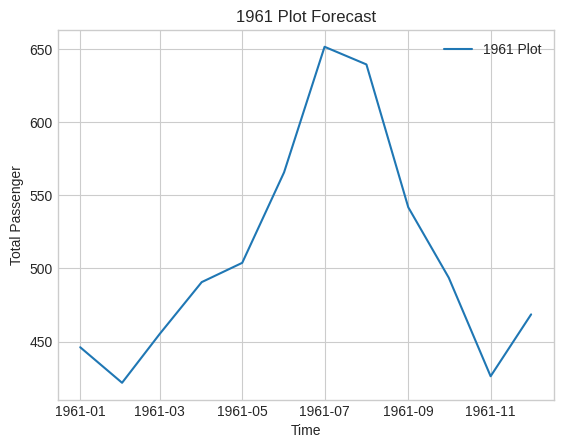

In [28]:
plt.plot(logits, label="1961 Plot")

plt.title("1961 Plot Forecast")

plt.xlabel("Time")

plt.ylabel("Total Passenger")

plt.legend();

Our Model is Forecasting that the Peak of Our Total Airline Passengers is in July, During the Summer Holiday

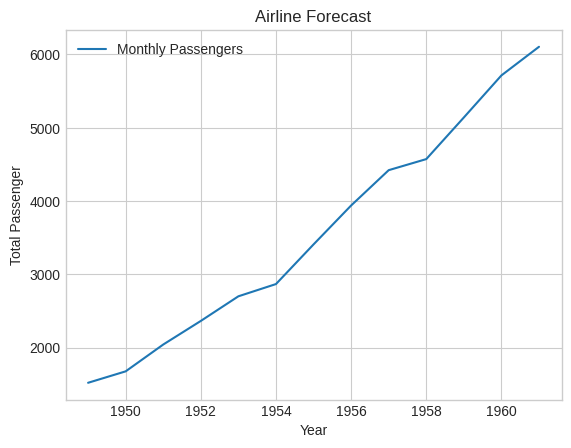

In [29]:
logits_indices = pandas.date_range(start='1961-01-01', end='1961-12-01', freq='MS')

logits_table = pandas.Series(logits, index=logits_indices, name='Monthly Passengers')

airline_logits = pandas.concat([airline, logits_table])

yearly = airline_logits.groupby(airline_logits.index.year).sum()

yearplot = yearly.plot.line(title="Airline Forecast", xlabel="Year", ylabel="Total Passenger");

Overall, *Our Total Yearly Passengers is Increasing*